**STEP 1: IMPORT LIBRARIES**

In [ ]:
# pandas: data manipulation
# numpy: numerical calculations
# matplotlib, seaborn: for plotting visualizations
# sklearn: for preprocessing, model training, evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

# Additional imports for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

**STEP 2: MOUNT GOOGLE DRIVE**

In [ ]:
# To access CSV file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **STEP 3: LOAD DATASET**

In [ ]:
file_path = "/content/drive/MyDrive/AI Assignment/WELFake_Dataset.csv" # Update with your path if needed
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


**STEP 4: DATA INSPECTION**

In [ ]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


**STEP 5: HANDLE MISSING VALUES**

In [ ]:
# Check for missing values
df.isnull().sum()

# Fill missing values in 'title' and 'text' with empty string
df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')

**STEP 6: COMBINE TITLE AND TEXT**

In [ ]:
# Create a new column 'content' by combining title and text
df['content'] = df['title'] + ' ' + df['text']

**STEP 7: DROP UNNECESSARY COLUMNS**

In [ ]:
# Drop the 'Unnamed: 0' column as it seems like an index
df = df.drop(columns=['Unnamed: 0'])

# Preview updated DataFrame
df.head()

,title,text,label,content
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


**STEP 8: EDA - LABEL DISTRIBUTION**

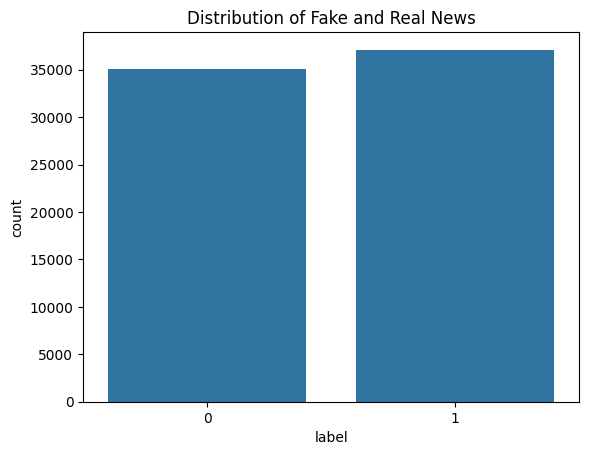

In [ ]:
# Visualize the distribution of labels (0: fake, 1: real)
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake and Real News')
plt.show()

**STEP 9: FEATURE ENGINEERING**

In [ ]:
# Import necessary libraries for feature engineering
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

# Function to count words
def word_count(text):
    return len(text.split())

# Function to count characters
def char_count(text):
    return len(text)

# Function to calculate average word length
def avg_word_length(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

# Function to count punctuation
def punctuation_count(text):
    return sum(1 for char in text if char in punctuations)

# Function to count stopwords
def stopword_count(text):
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)

# Apply feature engineering
df['word_count'] = df['text'].apply(word_count)
df['char_count'] = df['text'].apply(char_count)
df['avg_word_length'] = df['text'].apply(avg_word_length)
df['punctuation_count'] = df['text'].apply(punctuation_count)
df['stopword_count'] = df['text'].apply(stopword_count)

# Preview new features
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,text,label,content,word_count,char_count,avg_word_length,punctuation_count,stopword_count
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,871,5049,4.717566,182,390
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,8,46,4.875000,1,4
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,34,216,5.264706,2,12
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",1321,8010,5.041635,154,558
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,329,1916,4.823708,42,123


**STEP 10: EDA - VISUALIZE NEW FEATURES**

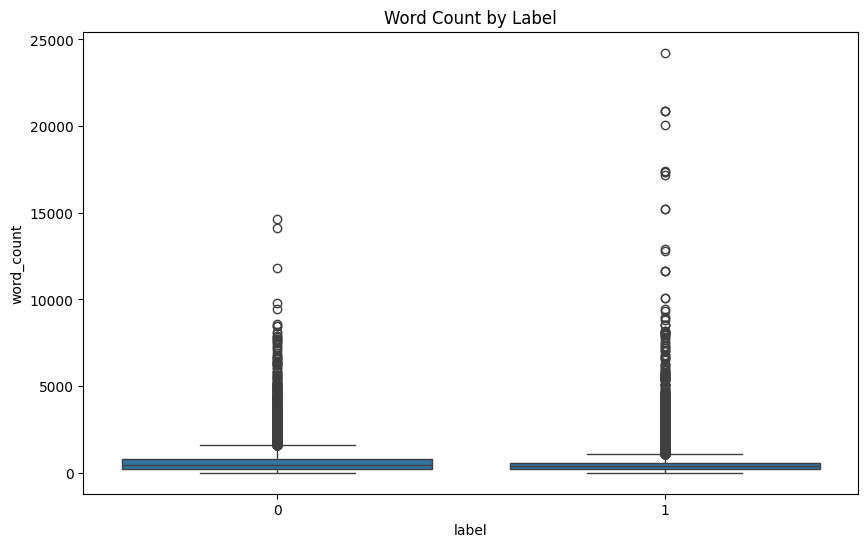

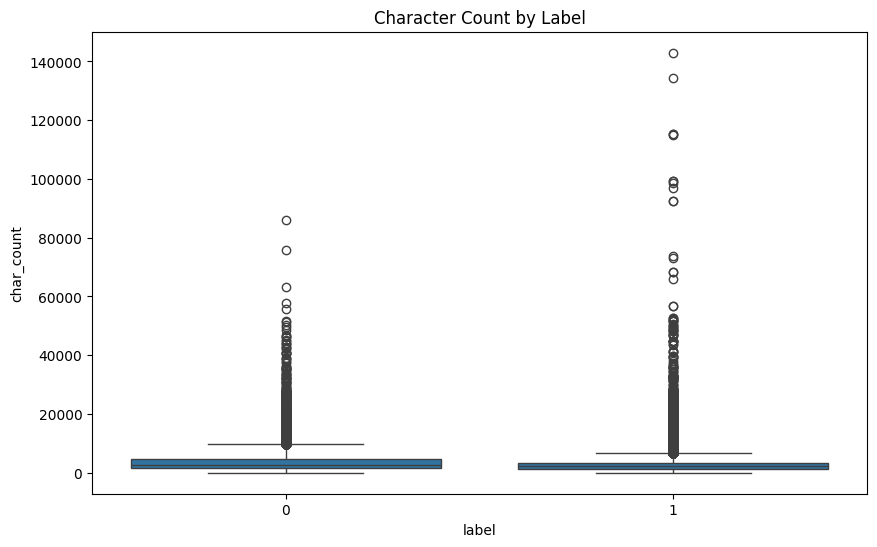

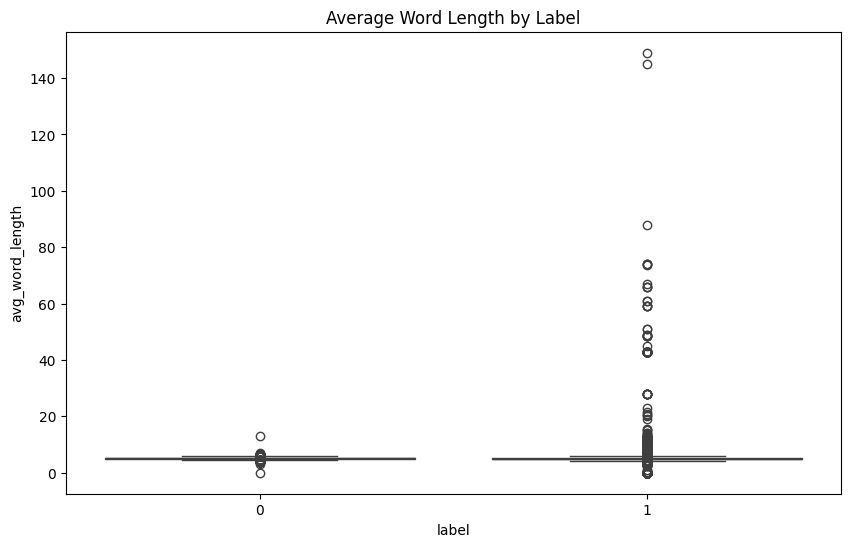

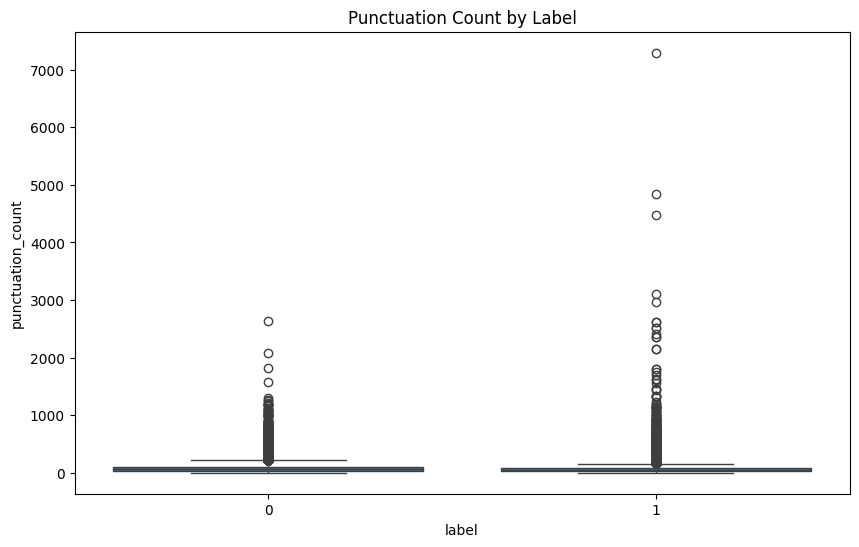

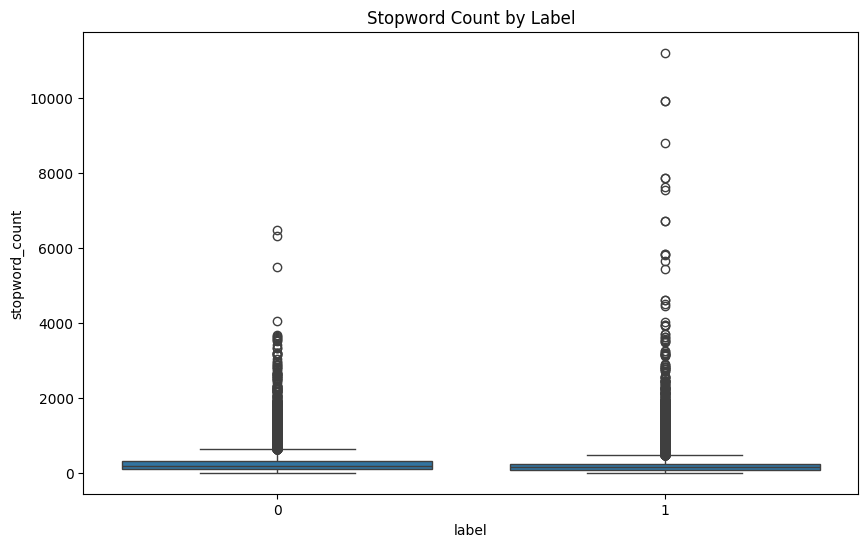

In [ ]:
# Word count distribution by label
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='word_count', data=df)
plt.title('Word Count by Label')
plt.show()

# Character count distribution by label
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='char_count', data=df)
plt.title('Character Count by Label')
plt.show()

# Average word length by label
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='avg_word_length', data=df)
plt.title('Average Word Length by Label')
plt.show()

# Punctuation count by label
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='punctuation_count', data=df)
plt.title('Punctuation Count by Label')
plt.show()

# Stopword count by label
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='stopword_count', data=df)
plt.title('Stopword Count by Label')
plt.show()

**STEP 11: SAVE PROCESSED DATA**

In [ ]:
# Save the processed DataFrame to a new CSV file
processed_file_path = '/content/drive/MyDrive/AI Assignment/processed_fake_news_data.csv'
df.to_csv(processed_file_path, index=False)

**STEP 12: PREPARE DATA FOR MODELING**

In [ ]:
# Features and target
X = df['text']  # Using 'text' column for simplicity; could use 'content'
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**STEP 13: DEFINE AND TUNE RANDOM FOREST MODEL (WITH VARIETIES)**

In [17]:
# Model suitability: Random Forest is suitable for this binary classification task on text data as it handles high-dimensional TF-IDF features well, reduces overfitting through ensemble learning, and captures non-linear patterns in news content (e.g., word combinations indicative of fake news).
# Implementation details: Using sklearn's RandomForestClassifier with TF-IDF vectors. Libraries: sklearn.ensemble, model_selection, metrics.
# Parameter tuning methods: GridSearchCV for automated hyperparameter search.
# Number and variety of models: 9 varieties (3 n_estimators x 3 max_depth) trained via grid search.
rf_model = RandomForestClassifier(random_state=42)  # Base model

# Parameter grid for varieties
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees: more reduces variance
    'max_depth': [10, 20, None]      # Depth: limited to avoid overfitting, None for full growth
}

# Grid search with 5-fold CV, scoring on F1 (appropriate for potentially imbalanced fake news classes)
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)  # n_jobs=-1 for parallel processing
grid.fit(X_train_tfidf, y_train)

# Best model from tuning
best_rf = grid.best_estimator_
print("Best Hyperparameters:", grid.best_params_)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 150}


**STEP 14: EVALUATE THE BEST MODEL ON TEST DATA**

Accuracy: 0.9424
F1-Score: 0.9453
Precision: 0.9235
Recall: 0.9682
AUC: 0.9901


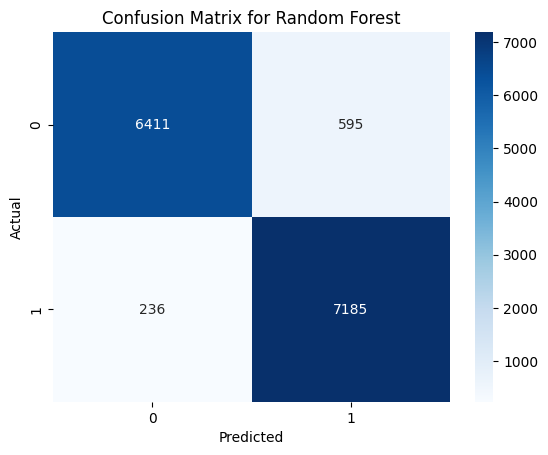

In [18]:
y_pred = best_rf.predict(X_test_tfidf)
y_pred_proba = best_rf.predict_proba(X_test_tfidf)[:, 1]  # For AUC

# Evaluation metrics for each variety: Handled in GridSearchCV (mean F1 across folds). For best model: Accuracy (overall correctness), F1 Score (balance precision/recall, suitable for classification where false positives/negatives matter equally in fake news detection), Precision (avoid false fakes), Recall (catch all fakes), Confusion Matrix (error types), AUC (discrimination ability).
# Why appropriate: Dataset is binary classification; metrics handle imbalance if present. Validation: 5-fold cross-validation for robust estimates, train-test split for final eval.
# Limitations: Computationally intensive (long training time on large data); less interpretable than single trees. Observations: Deeper trees may overfit; more estimators stabilize predictions. Improvements: Use feature importance to prune TF-IDF features; ensemble with other models like XGBoost.
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

**STEP 15: COMPARE VARIETIES FROM GRID SEARCH**

In [19]:
# A comparison between two or more varieties: Table of all 9 with CV F1 scores; conclusion on best.
results = pd.DataFrame(grid.cv_results_)
comparison_table = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
comparison_table = comparison_table.sort_values('rank_test_score')
print("Comparison of Model Varieties (Higher mean_test_score/F1 is better):")
print(comparison_table)

# Conclusion: The variety with the highest rank (lowest rank_test_score) is best, e.g., higher depth and estimators often perform better but risk overfitting.

Comparison of Model Varieties (Higher mean_test_score/F1 is better):
                                     params  mean_test_score  std_test_score  \
8  {'max_depth': None, 'n_estimators': 150}         0.941347        0.003044   
7  {'max_depth': None, 'n_estimators': 100}         0.940302        0.003262   
6   {'max_depth': None, 'n_estimators': 50}         0.937974        0.002512   
5    {'max_depth': 20, 'n_estimators': 150}         0.919891        0.003305   
4    {'max_depth': 20, 'n_estimators': 100}         0.919888        0.003088   
3     {'max_depth': 20, 'n_estimators': 50}         0.918879        0.002826   
1    {'max_depth': 10, 'n_estimators': 100}         0.899084        0.002569   
2    {'max_depth': 10, 'n_estimators': 150}         0.898746        0.002991   
0     {'max_depth': 10, 'n_estimators': 50}         0.897816        0.002877   

   rank_test_score  
8                1  
7                2  
6                3  
5                4  
4                5  
3   

**STEP 16: PREDICT ON NEW DATA**

In [20]:
# Sample news articles
news_articles = [
    "U.N. seeks humanitarian pause in Sanaa where streets ",  # FAKE (short/incomplete)
    "LOS ANGELES (Reuters) - Editors Note: Attention to language that may be offensive to some readers in paragraph 3 The National Mall in Washington could become a sea of bright pink the day after Donald Trump is inaugurated as U.S. president if the vision of a pair of Los Angeles women is realized.   For two months, Krista Suh and Jayna Zweiman have called on people around the world to make 1.17 million pink â€œpussyhatsâ€ for those attending the Womenâ€™s March, a rally on Jan. 21 organized with hopes of bringing attention to civil and human rights issues. The name of the hats comes partly from President-elect Trumpâ€™s comments in an infamous 2005 tape that came to light during his campaign in which, discussing women, he said: â€œGrab them by the pussy. You can do anything.â€ The project is meant to â€œcreate a sea of pink hats which is going to be a strong collective visual statement,â€ Zweiman said.  It is also meant to involve â€œpeople across the country and the world who want to be a part of the march but canâ€™t physically be there and want to support the marchers,â€ she said.  The women have asked volunteers around the world to help sew, crochet or knit pink hats with ears by using simple patterns available on the projectâ€™s website. They say it is easier than knitting a scarf, the typical starter project for novices. â€œItâ€™s a rectangle folded in half, stitched up the sides and when you put it on your round head, these ears come out,â€ said Zweiman, surrounded by women stitching away at a knitting store on Friday night. Marchers can get a hat by contacting a maker through an online distribution system, through social media or at sites in Washington. â€œSo itâ€™s a distribution system thatâ€™s very grassroots and our aim is to get a hat on every marcherâ€™s head who wants one,â€ Zweiman said. Organizers have said the protest could draw around 200,000 people, but Suh and Zweiman decided to aim for the 1.17 million people that could feasibly fit in the Mall. For some knitters at Fridayâ€™s â€œpussyhat party,â€ it was hard to put the needles down as the deadline nears. â€œDoing this is taking my mind off things,â€ said Marina Montâ€™Ros.  â€œThis will be my 35th hat. Every time I think â€˜OK, thatâ€™s enough. Iâ€™ve made enough, Iâ€™m going to stop,â€™ I read something in the news and, give me that yarn! Iâ€™m making more.â€ "  # REAL
]

# Convert using the trained TF-IDF
news_vectors = tfidf_vectorizer.transform(news_articles)

# Predict
predictions = best_rf.predict(news_vectors)

# Print results
for article, pred in zip(news_articles, predictions):
    label = "REAL" if pred == 1 else "FAKE"
    print(f"News: {article}\nPrediction: {label}\n")

News: U.N. seeks humanitarian pause in Sanaa where streets 
Prediction: REAL

News: LOS ANGELES (Reuters) - Editors Note: Attention to language that may be offensive to some readers in paragraph 3 The National Mall in Washington could become a sea of bright pink the day after Donald Trump is inaugurated as U.S. president if the vision of a pair of Los Angeles women is realized.   For two months, Krista Suh and Jayna Zweiman have called on people around the world to make 1.17 million pink â€œpussyhatsâ€ for those attending the Womenâ€™s March, a rally on Jan. 21 organized with hopes of bringing attention to civil and human rights issues. The name of the hats comes partly from President-elect Trumpâ€™s comments in an infamous 2005 tape that came to light during his campaign in which, discussing women, he said: â€œGrab them by the pussy. You can do anything.â€ The project is meant to â€œcreate a sea of pink hats which is going to be a strong collective visual statement,â€ Zweiman said.